In [1]:
#Discription :This programe use an artificial recurrent neural network called long short term memory(lstm)
#     to predict the closing stock price of a corcorporation (company) using the past 60 days stock price

In [2]:
# import libraries 
import math
import pandas_datareader as web#for fetch the data from yahoo finance website
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler# for converting the no. into array
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
# 1st method to fetch the data from website 
df=web.DataReader("BAJAJ-AUTO.NS",data_source="yahoo",start="2013-01-01",end="2020-12-17")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-01,2150.000000,2122.500000,2147.000000,2131.899902,145037.0,1694.256104
2013-01-02,2215.000000,2137.050049,2144.000000,2202.250000,561496.0,1750.164551
2013-01-03,2229.000000,2205.000000,2215.000000,2214.899902,411809.0,1760.217407
2013-01-04,2216.050049,2192.149902,2215.000000,2205.600098,220400.0,1752.827026
2013-01-07,2215.000000,2186.300049,2203.649902,2196.899902,212741.0,1745.912720
...,...,...,...,...,...,...
2020-12-11,3337.149902,3285.550049,3295.600098,3327.649902,611154.0,3216.417236
2020-12-14,3334.550049,3265.000000,3327.649902,3289.000000,425416.0,3179.059082
2020-12-15,3347.199951,3262.000000,3284.000000,3271.649902,746643.0,3162.289062


In [4]:
#2nd method to fetch the data from website 
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

data2 = pdr.get_data_yahoo("^NSEI", start="2017-01-01", end="2019-12-17")

data2


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300
2017-01-03,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300
2017-01-04,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400
2017-01-05,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100
2017-01-06,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400
...,...,...,...,...,...,...
2019-12-10,11950.500000,11953.200195,11844.700195,11856.799805,11856.799805,650200
2019-12-11,11867.349609,11923.200195,11832.299805,11910.150391,11910.150391,997700
2019-12-12,11944.299805,12005.500000,11934.000000,11971.799805,11971.799805,752600


In [5]:
# get the no of rows and columns in the data
df.shape

(1961, 6)

In [6]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1961.000000,1961.000000,1961.000000,1961.000000,1.961000e+03,1961.000000
mean,2607.059989,2544.923847,2577.042196,2574.977563,4.293521e+05,2260.158386
std,421.183792,417.141290,419.443511,418.434629,3.750743e+05,460.241553
min,1705.800049,1656.000000,1670.099976,1673.599976,0.000000e+00,1330.037598
25%,2278.600098,2202.050049,2240.050049,2242.300049,2.251810e+05,1881.676392
50%,2678.000000,2621.250000,2647.000000,2651.449951,3.227850e+05,2361.927246
75%,2921.699951,2856.199951,2893.449951,2887.250000,5.008360e+05,2594.545654
max,3468.350098,3341.100098,3419.000000,3412.949951,4.976986e+06,3226.566162


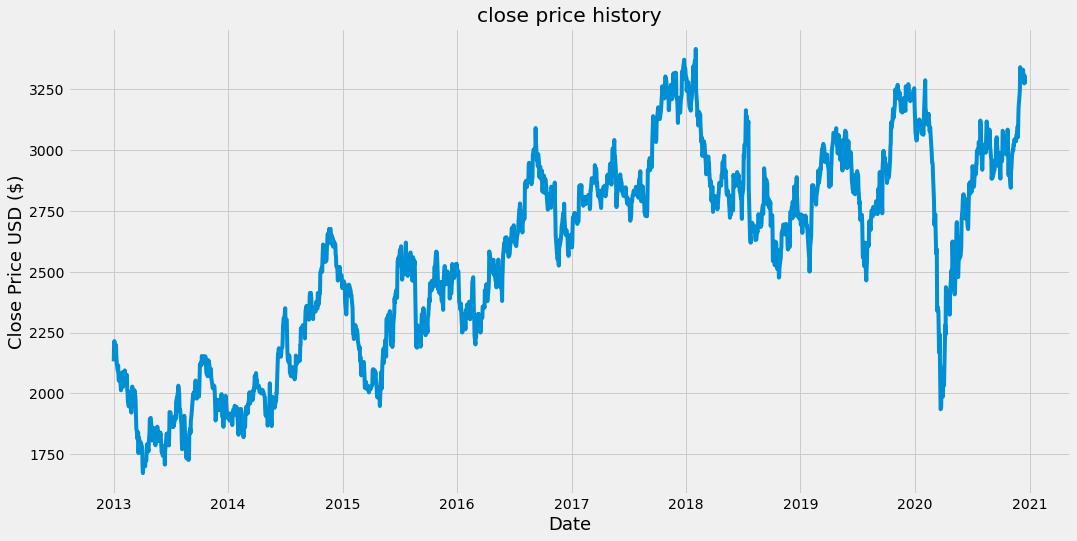

In [7]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("close price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()
#2012-2013 it touch the highest lower price

In [8]:
df3=pd.DataFrame(df)
df3.to_csv("BAJAJ AUTO.csv")
df.to_excel("BAJAJ AUTO.xlsx")

In [9]:
#create new data frame only need a close column
data=df.filter(["Close"])
#Convert the dataframe into numpy array
dataset=data.values
#Get the no of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

1569

In [10]:
df.values

array([[  2150.        ,   2122.5       ,   2147.        ,
          2131.89990234, 145037.        ,   1694.25610352],
       [  2215.        ,   2137.05004883,   2144.        ,
          2202.25      , 561496.        ,   1750.16455078],
       [  2229.        ,   2205.        ,   2215.        ,
          2214.89990234, 411809.        ,   1760.21740723],
       ...,
       [  3347.19995117,   3262.        ,   3284.        ,
          3271.64990234, 746643.        ,   3162.2890625 ],
       [  3308.44995117,   3252.        ,   3289.        ,
          3303.5       , 616704.        ,   3193.07446289],
       [  3330.        ,   3258.        ,   3307.10009766,
          3270.44995117, 678073.        ,   3161.12915039]])

In [11]:
df.shape

(1961, 6)

In [12]:
#scale the data(scaled the data between 0 to 1)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.2634892 ],
       [0.3039354 ],
       [0.31120817],
       ...,
       [0.91876273],
       [0.93707422],
       [0.91807284]])

In [13]:
#create the training dataset
#create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train,y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):# only takes the past 60 values
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()
# on the basis of 60 independent variables(....) its predicting the 1 dependent variable(closing price) 

[array([0.2634892 , 0.3039354 , 0.31120817, 0.30586146, 0.30085948,
       0.30175064, 0.27843731, 0.26708249, 0.25555531, 0.24132586,
       0.25397426, 0.23163827, 0.21798375, 0.22172077, 0.22105966,
       0.22626265, 0.20677266, 0.19515916, 0.23365052, 0.23747373,
       0.20596775, 0.2039555 , 0.20326562, 0.21982349, 0.22479669,
       0.24210192, 0.23468542, 0.22433672, 0.21459166, 0.21338433,
       0.23143699, 0.19846499, 0.18915112, 0.17060971, 0.15695519,
       0.18078597, 0.17771005, 0.1781988 , 0.18400555, 0.19314691,
       0.142582  , 0.16701642, 0.17213328, 0.2039268 , 0.18144708,
       0.17236327, 0.17230579, 0.18435049, 0.19538907, 0.17977985,
       0.16233074, 0.12751893, 0.10417689, 0.10158972, 0.07962745,
       0.09331075, 0.09566794, 0.04697161, 0.08454311, 0.07410816])]
[0.0733894996440041]



In [14]:
#convert the x_train and y_train into numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [15]:
print(x_train.shape),print(y_train.shape)

(1509, 60)
(1509,)


(None, None)

In [59]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#[0](1509)#[1](60),1 for 3 dimension
x_train.shape

(1509, 60, 1)

In [60]:
#Build LSTM model 
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [61]:
#compile the model
model.compile(optimizer="adam",loss='mean_squared_error')

In [62]:
#Train the model
#fit is another name of train
model.fit(x_train,y_train,batch_size=1,epochs=1)

1509/1509 [==============================] - 34s 22ms/step - loss: 0.0033


In [63]:
#creating testing data set
#create the new array containing scaled values from index 1505 to1956
test_data=scaled_data[training_data_len-60:,:]
#create the data x_test,y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [64]:
#convert the data into numpy array
x_test=np.array(x_test)

In [65]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.66087914],
        [0.6625176 ],
        [0.64386124],
        ...,
        [0.71339868],
        [0.7296116 ],
        [0.78560962]],

       [[0.6625176 ],
        [0.64386124],
        [0.64061295],
        ...,
        [0.7296116 ],
        [0.78560962],
        [0.76620582]],

       [[0.64386124],
        [0.64061295],
        [0.63305257],
        ...,
        [0.78560962],
        [0.76620582],
        [0.75068278]],

       ...,

       [[0.77362233],
        [0.79187627],
        [0.75493719],
        ...,
        [0.92980145],
        [0.95095866],
        [0.92873777]],

       [[0.79187627],
        [0.75493719],
        [0.75444858],
        ...,
        [0.95095866],
        [0.92873777],
        [0.91876273]],

       [[0.75493719],
        [0.75444858],
        [0.75464972],
        ...,
        [0.92873777],
        [0.91876273],
        [0.93707422]]])

In [66]:
#get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [67]:
#get the root mean squared error(RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

92.99113343428245

In [68]:
# 2nd way
rmse2 = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse2

92.99113343428245

In [69]:
#3 way
rmse3 = np.sqrt(((predictions - y_test) ** 2).mean())
rmse3

92.99113343428245

<ipython-input-73-ae69ade13f27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"]=predictions


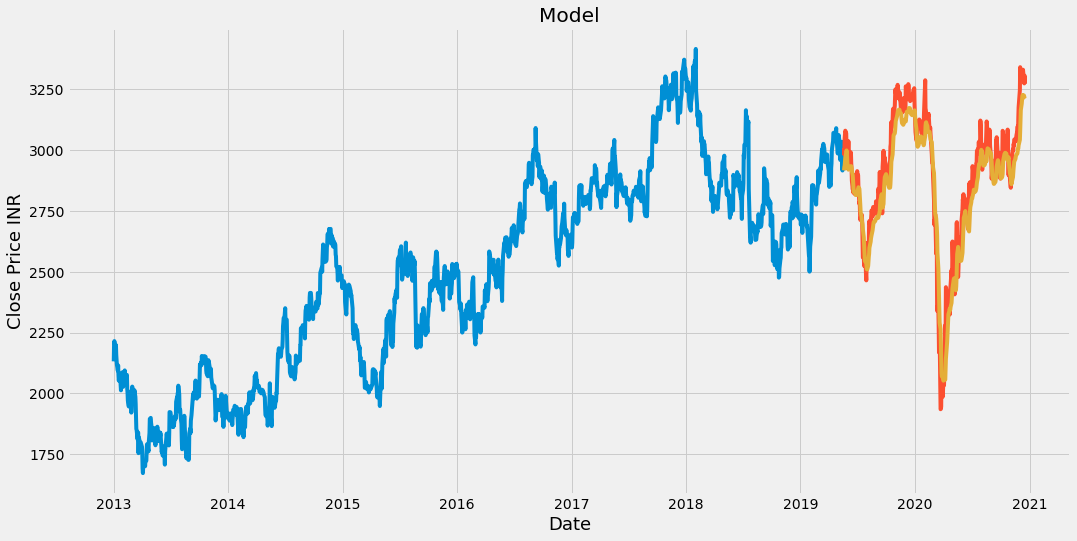

In [73]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid["predictions"]=predictions
# visual the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price INR",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[["Close","predictions"]])
plt.legend
plt.show()
#Blue line=Train 
#Orange line=val(actual values of the day or actuall closing stock price of Bajaj Stock)
#Yellow=Predictions(our model prediction predicted values)

In [74]:
#show the valid and predicted prices
valid

,Close,predictions
Date,,
2019-05-20,3006.300049,2915.036377
2019-05-21,2979.300049,2929.129150
2019-05-22,3047.199951,2934.907471
2019-05-23,3065.000000,2949.814453
2019-05-24,3077.899902,2967.708496
...,...,...
2020-12-11,3327.649902,3220.202881
2020-12-14,3289.000000,3222.353271
2020-12-15,3271.649902,3217.849854


In [75]:
#Get the quotes
Bajaj_quote=web.DataReader("BAJAJ-AUTO.NS",data_source="yahoo",start="2013-01-01",end="2020-12-17")
#create the new dataframe
new_df=Bajaj_quote.filter(["Close"])# only get the close column
#Get the last 60 days closing price values and convert the dataframe into array
last_60_days=new_df[-60:].values#only get the last 60 days closing price
#scale the data between 0 to 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset into numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the Predicted scaled price
pred_price= model.predict(X_test)
#undo the Scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

[[3202.142]]


In [76]:
#Get the quotes
Bajaj_quote2=web.DataReader("BAJAJ-AUTO.NS",data_source="yahoo",start="2020-12-17",end="2020-12-17")
print(Bajaj_quote2['Close'])

Date
2020-12-17    3270.449951
Name: Close, dtype: float64
